Creating a DataFrame

In [91]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot  as plt

In [92]:
data = {'Year':[
    2010, 2011, 2012,
    2010, 2011, 2012,
    2010, 2011, 2012
],
'Team':[
    'FCBar celon a', 'FCBar celo na',
    'FC Bar celo na', 'RMa drid',
    'RMadrid', 'RMadrid',
    'Valen ciaCF', 'Valen ciaCF',
    'Valen ciaCF'    
],

'wins': [30 , 28, 32, 29, 32, 26, 21, 17, 19] ,
'draws': [6 , 7, 4, 5, 4, 7, 8, 10 , 8] ,
'losses': [2 , 3, 2, 4, 2, 5, 9, 11 , 11]

}
football = pd.DataFrame(data,columns= [
    'Year', 'Team', 'wins', 'draws', 'losses'
]
)
football


,Year,Team,wins,draws,losses
0,2010,FCBar celon a,30,6,2
1,2011,FCBar celo na,28,7,3
2,2012,FC Bar celo na,32,4,2
3,2010,RMa drid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,Valen ciaCF,21,8,9
7,2011,Valen ciaCF,17,10,11
8,2012,Valen ciaCF,19,8,11


Reading Data

In [93]:
import pandas as pd
edu = pd.read_csv ('C:/Users/ALICE/Desktop/Data science/intro_toDataScience/educ_figdp_1_Data.csv', usecols = ['TIME' , 'GEO' ,'Value' ])
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),:
1,2001,European Union (28 countries),:
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [94]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),:
1,2001,European Union (28 countries),:
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [95]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [96]:
edu.describe()

,TIME
count,384.000000
mean,2005.500000
std,3.456556
min,2000.000000
25%,2002.750000
50%,2005.500000
75%,2008.250000
max,2011.000000


In [97]:
# Selecting Data
edu['Value']

0         :
1         :
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: object

In [98]:
# select a subset of rows from a DataFrame, we can do so by indicatinga range of rows separated by a colon (:) inside the square brackets. This is commonlyknown as a slice of rows:
#this does not use index it uses position
edu [10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


In [99]:
# select a subset of columns and rows using the labels as our references instead of the positions, we can use ixindexing:
# you can also use #edu.ix[ 90:94 , ['Time', 'GEO']]
edu . iloc[ 90: 94 ]

,TIME,GEO,Value
90,2006,Belgium,5.98
91,2007,Belgium,6.00
92,2008,Belgium,6.43
93,2009,Belgium,6.57


Filtering Data
Another way to select a subset of data is by applying Boolean indexing. This indexing is commonly known as a filter. For instance, if we want to filter those values less than or equal to 6.5, we can do it like this:


In [100]:
# Convert the 'Value' column to numeric, invalid parsing will be set as NaN
edu['Value'] = pd.to_numeric(edu['Value'], errors='coerce')
edu [edu['Value'] > 6.5].tail()

# To filter missing values
edu [edu['Value'] .isnull()] .head()



,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


Data Manipulation
To manipulate data, select desired data and use aggregation functions to operate with columns or rows. If a function is applied to a DataFrame, specify if it should be applied to the rows for each column or columns for each row.


In [101]:
edu.max (axis=0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [102]:
#pandas maxfunctionexcludes NaN values, thus they are interpreted as missing values,while the standard Python max function will take the mathematical interpretation of NaN and return it as the maximum:
print("panda max function:", edu['Value'].max())

print ("Python max Function:", max (edu['Value']))

panda max function: 8.81
Python max Function: nan


In [103]:
# Using operators
op = edu ['Value']/ 100
op.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

In [ ]:
# Applying a functions in a DataFrame
func = edu['Value'] . apply(np . sqrt)
func.head()


0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

In [105]:
#Instead of dropping a nan value fill them with another value
#eduFilled = edu.fillna ('value' == {'value':0})
eduFilled = edu.fillna({'Value':0})
eduFilled.head()


,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [106]:
#Sorting
edu.sort_values(by='Value', ascending=False, inplace=True)
edu.head()

# Rearranging after sorting

edu.sort_index(axis=0 , ascending=True, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [107]:
#Grouping data using groupby function

group = edu[['Value', 'GEO']].groupby('GEO') . mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [108]:
# Transposing data
filtered_data = edu[edu['TIME' ] > 2005]
pivedu = pd.pivot_table(filtered_data , values= 'Value', index=['GEO'], columns=['TIME'] )

pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [109]:
#print(pivedu.columns)
pivedu.loc[['Spain', 'Portugal'], [2006,2011]]


TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


In [110]:
#Ranking Data
# First clean the data

#print(pivedu.index)  # To check row indices
#print(pivedu.columns)  # To check column names

# Strip any leading/trailing spaces from the index labels
pivedu.index = pivedu.index.str.strip()

pivedu = pivedu.drop([
    'Euro area (13 countries)',
    'Euro area(15 countries)', 
    'Euro area(17 countries)', 
    'Euro area(18 countries)', 
    'European Union(25 countries)',  
    'European Union(27 countries)',
    'European Union(28 countries)'
], axis=0, errors='ignore') 

pivedu = pivedu.rename(index={'Germany(until 1990 former territoryof the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending= False, method = 'first')

pivedu.head()




TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [111]:
# to rank globally taking into account the years

tsum = pivedu.sum(axis= 1)
tsum.rank(ascending = False, method = 'dense').sort_values().head()


GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

Plotting

<Axes: title={'center': 'Total Values for Country'}, xlabel='GEO'>

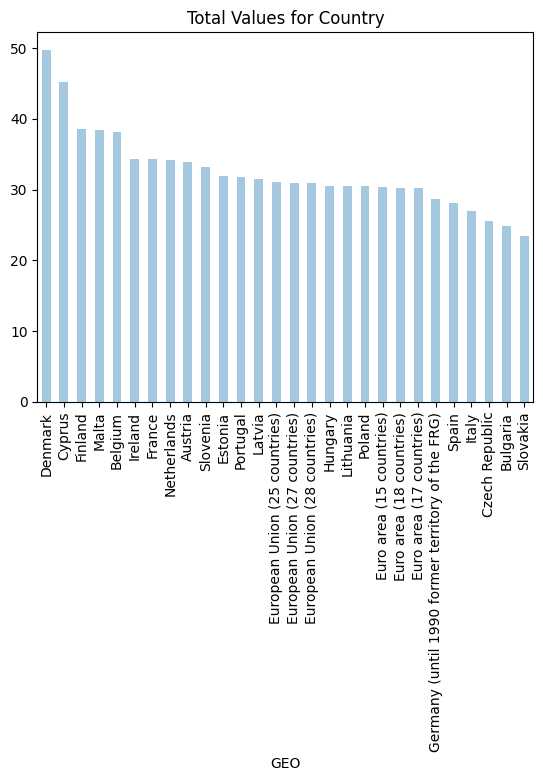

In [133]:
tsum = pivedu.sum(axis = 1).sort_values(ascending = False)
tsum.plot(kind = 'bar', style = 'b', alpha = 0.4, title = "Total Values for Country" )

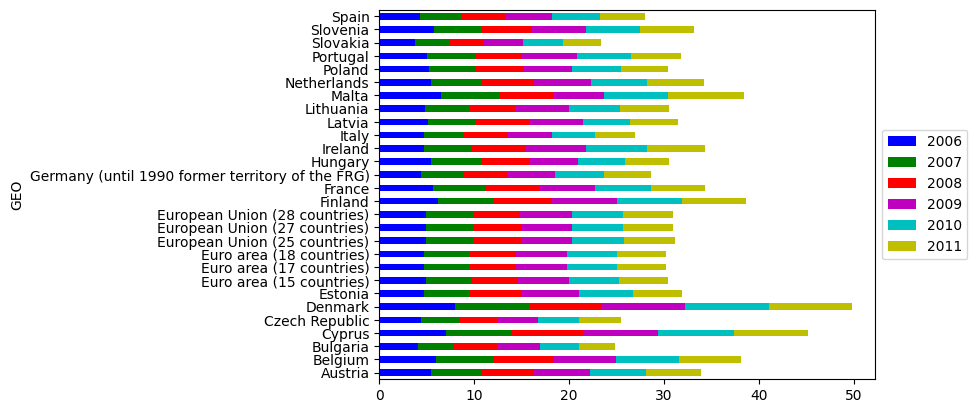

In [124]:
my_colors = ('b', 'g', 'r', 'm', 'c', 'y')
ax = pivedu.plot( kind = 'barh', stacked = True, color = my_colors)
ax.legend(loc = 'center left', bbox_to_anchor = (1, .5))